# EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set colorblind color palette
sns.set_palette("colorblind")

In [5]:
# Read in data
data = pd.read_csv("../data/merged_data_cleaned.csv", low_memory=False)
target = pd.read_csv("../data/target.csv")

In [8]:
# Convert the columns to lower case
target.columns = target.columns.str.lower()

## Injury distribution

In [49]:
injury_data = pd.read_csv("../data/CSpine/CSV datasets/injuryclassification.csv")

# Convert Nan values to 0
injury_data = injury_data.fillna(0)
injury_data = injury_data.replace({'Y': 1, 'N': 0}).infer_objects(copy=False)
injury_data.columns = injury_data.columns.str.lower()

# Eliminate any dtype object columns
#injury_data = injury_data.select_dtypes(exclude=['object'])

C:\Users\kurt-\AppData\Local\Temp\ipykernel_4536\1072551168.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  injury_data = injury_data.replace({'Y': 1, 'N': 0}).infer_objects(copy=False)


In [48]:
injury_data["liga"]

site                        int64
caseid                      int64
studysubjectid              int64
csfractures                 int64
cfracturesoc                int64
                            ...  
signalchangelevelc4         int64
signalchangelevelc5         int64
signalchangelevelc6         int64
signalchangelevelc7         int64
cordinjurynoradiographic    int64
Length: 178, dtype: object

In [45]:
injury_data.columns

Index(['site', 'caseid', 'studysubjectid', 'csfractures', 'cfracturesoc',
       'cfracturesc1', 'c1sbfracturear', 'c1sbfracturetp', 'c1sbfracturelm',
       'c1sbfractureoi',
       ...
       'c7_t1sbligscpl', 'cspinesignalchange', 'signalchangelevelc1',
       'signalchangelevelc2', 'signalchangelevelc3', 'signalchangelevelc4',
       'signalchangelevelc5', 'signalchangelevelc6', 'signalchangelevelc7',
       'cordinjurynoradiographic'],
      dtype='object', length=178)

In [ ]:
injury_site = injury_data.groupby(["site"]).sum()["csfractures","ligamentousinjuryc45"]

KeyError: ('csfractures', 'ligamentousinjuryc45')

## Cases

In [28]:
# Get distribution of target variable per site in data
data_target = pd.merge(data, target, on="studysubjectid")

# Create a groupby object
cases_per_site = data_target.groupby("site").sum()["csfractures_y"] / data_target.groupby("site").count()["csfractures_y"]

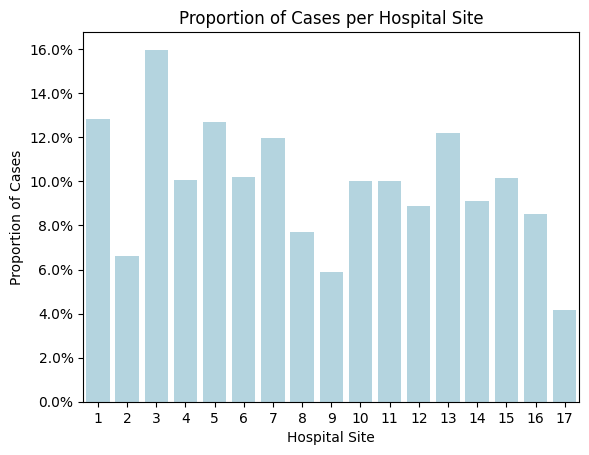

In [29]:
sns.barplot(x=cases_per_site.index, y=cases_per_site.values, color="lightblue")
plt.xlabel("Hospital Site")
plt.ylabel("Proportion of Cases")
plt.title("Proportion of Cases per Hospital Site")
plt.title("Proportion of Cases per Hospital Site")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.savefig("../plots/cases_per_site.pdf", bbox_inches="tight", dpi=300)
plt.show()